### Antes de comenzar

Se preparo el ambiente en MySQL Workbench para tener una database para tener donde importar la información
se creo una database llamada cine_mx, despues por medio de 'Table Data Import Wizard' se importo un archivo
csv del cual fue descargado desde la pagina 'https://datos.gob.mx/busca/dataset/catalogo-producciones-cinematograficas'
donde se obtuvo un conjunto de datos, los cuales no estaban tan saturados.

Cabe mencionar que en el mismo 'Table Data Import Wizard' se genero el mismo esquema para la tabla 'peliculas'

In [5]:
%pip install mysql-connector-python matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


### Importes

In [6]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

### Conectar a la base de datos

In [7]:
db = mysql.connector.connect(
        host="localhost",
        user="root",
        password="sushi22",
        database="cine_mx"
    )

mycursor = db.cursor()
db

#### A continuacion se muestra el primer query para que este se use como dataframe usando libreria pandas

In [47]:
query = "SELECT * FROM peliculas"

movies_df = pd.read_sql(query, db)

movies_df

C:\Users\Kramos\AppData\Local\Temp\ipykernel_21684\1944469469.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  movies_df = pd.read_sql(query, db)


,Titulo,Genero,Director,Anio
0,Limite,Experimental,Juan Arturo Brennan,1977
1,El amante africano,Ficcion,Jordi Garcia Bergua,1978
2,La mentirosa,Ficcion,Juan Arturo Brennan,1977
3,La oveja negra y otras fabulas,Animacion,Fernando Sampietro,1978
4,Monse,Ficcion,Gloria Ribe,1978
...,...,...,...,...
530,Makam Maj (ï¿½A donde vas? ),Ficcion,Sofia Ptacnik Rosas,2023
531,Apnea,Ficcion,Natalia Bermï¿½dez,2023
532,El brillo de la luciernaga,Ficcion,Augusto Reyes,2023
533,Manos Ajenas,Ficcion,Adrian Monroy,2023


### Para tener evidencia de la conexion y su funcionamiento se ejecuto lo siguiente para la edicion de una entrada, en este caso hablamos de la pelicula 'Limite', basandonos en el nombre de la pelicula y cambiando su año de estreno, cambiandolo del año 1977 a 1970

In [48]:
updateQuery = "UPDATE peliculas SET Anio = 1970 WHERE Titulo = 'Limite'"
mycursor.execute(updateQuery)

db.commit() #Necesario para hacer valer los cambios en la base de datos
print(mycursor.rowcount, "record(s) affected")

query = "SELECT * FROM peliculas"
movies_df = pd.read_sql(query, db)

movies_df

1 record(s) affected


C:\Users\Kramos\AppData\Local\Temp\ipykernel_21684\4213949847.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  movies_df = pd.read_sql(query, db)


,Titulo,Genero,Director,Anio
0,Limite,Experimental,Juan Arturo Brennan,1970
1,El amante africano,Ficcion,Jordi Garcia Bergua,1978
2,La mentirosa,Ficcion,Juan Arturo Brennan,1977
3,La oveja negra y otras fabulas,Animacion,Fernando Sampietro,1978
4,Monse,Ficcion,Gloria Ribe,1978
...,...,...,...,...
530,Makam Maj (ï¿½A donde vas? ),Ficcion,Sofia Ptacnik Rosas,2023
531,Apnea,Ficcion,Natalia Bermï¿½dez,2023
532,El brillo de la luciernaga,Ficcion,Augusto Reyes,2023
533,Manos Ajenas,Ficcion,Adrian Monroy,2023


Como se puede ver en el dataframe de arriba tuvimos exito.

### Graficar los datos

In [30]:
def plot_data(df):
    plt.scatter(df['Genero'], df['Anio'])
    plt.xlabel('Genero')
    plt.ylabel('Epoca')
    plt.title('Relevancia de generos')
    plt.show()

### Obtener datos y graficar

#### Analisis de datos graficados
##### Sorprendetemente las peliculas que mas se han financiado en Mexico (segun nuestros datos), con las peliculas del genero 'Ficcion'

C:\Users\Kramos\AppData\Local\Temp\ipykernel_860\2843365112.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  movies_filtered_df = pd.read_sql(query, db)


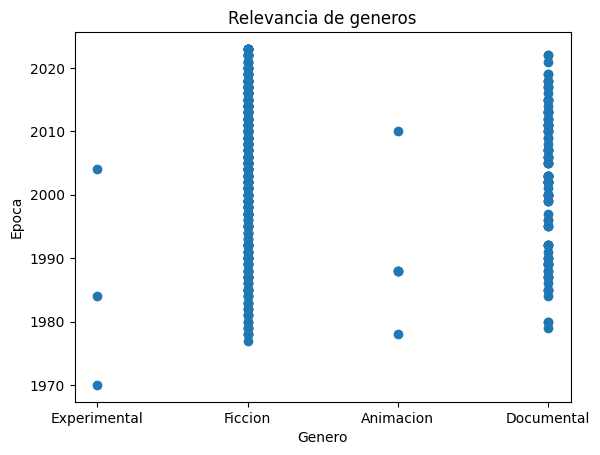

In [31]:
query = "SELECT Genero, Anio FROM peliculas"
movies_filtered_df = pd.read_sql(query, db)

movies_filtered_df

plot_data(movies_filtered_df)

### Por la naturaleza de la cantidad de los datos, hasta aqui llega el analisis (ya que el archivo csv contiene pocos datos).